In [126]:
import pandas as pd
from glob import glob
import seaborn as sns
import numpy as np

In [119]:
df = pd.concat([pd.read_csv(x, sep='\t', na_values='None') for x in glob('../output/*.tsv')], ignore_index=True)

In [135]:
size_lp = {
    'iIT341': 554, 
    'iMM904': 1577,
    'iML1515': 2712, 
    'iLB1027': 4456, 
    'iCHOv1': 6663, 
    'Recon3D': 10600, 
}

size_milp = {
    'iIT341': 74, 
    'iMM904': 164,
    'iML1515': 331, 
    'iLB1027': 30, 
    'iCHOv1': 602, 
    'Recon3D': 1560, 
}


df['size_lp'] = df['model'].apply(lambda x: np.log10(size_lp[x]))
df['size_milp'] = df['model'].apply(lambda x: np.log10(size_milp[x]))

<Axes: xlabel='size_lp', ylabel='size_milp'>

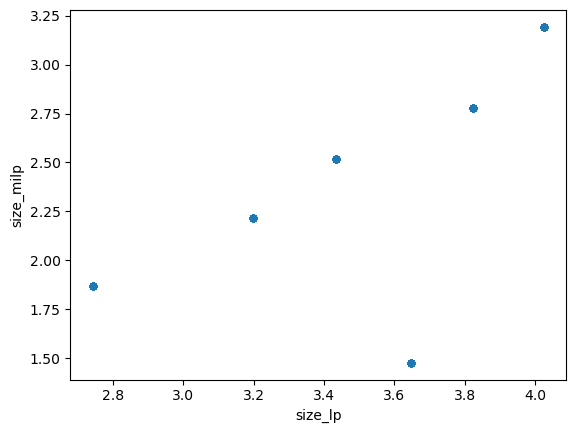

In [136]:
df.plot.scatter('size_lp', 'size_milp')

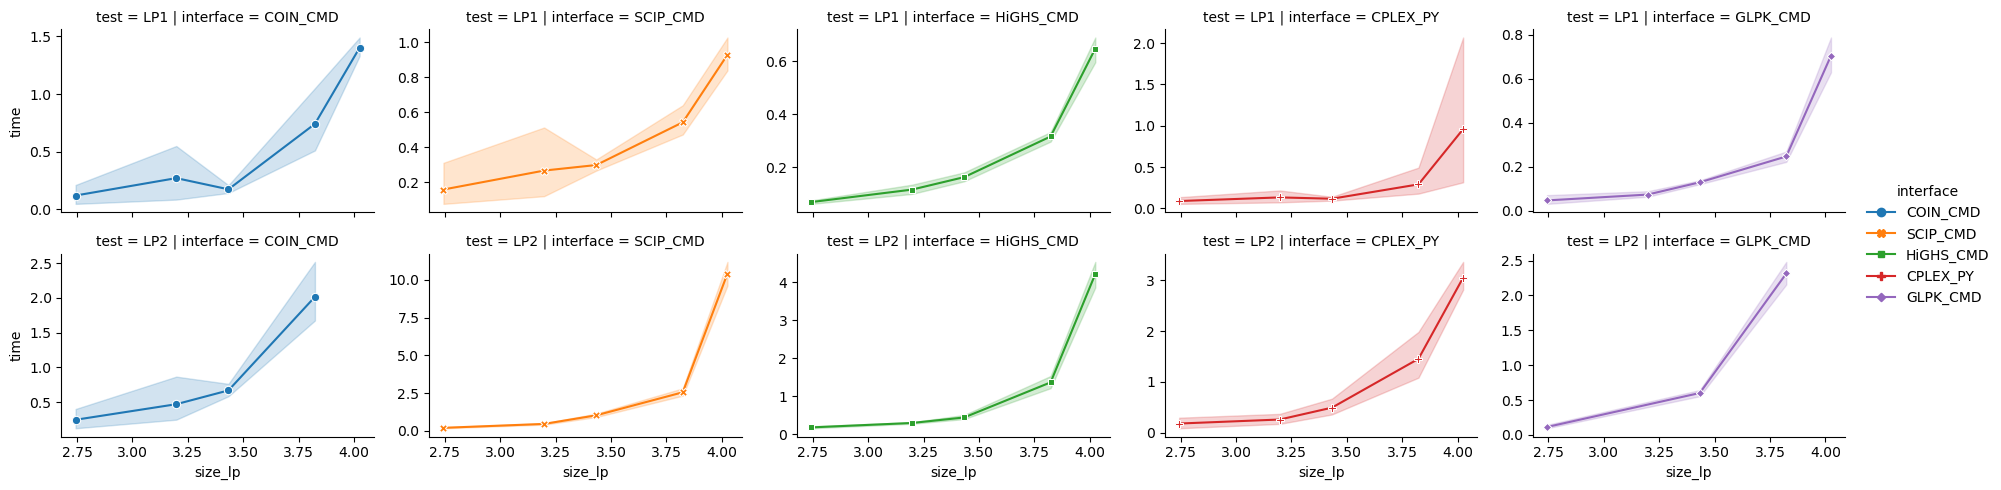

In [130]:
sns.relplot(data=df.dropna().query('model != "iLB1027"'), x="size_lp", y="time", col="interface", row="test", kind="line", height=2.5, aspect=1.5, markers=True, dashes=False, hue="interface", style="interface",
            row_order=['LP1', 'LP2'], facet_kws={'sharey': False} )

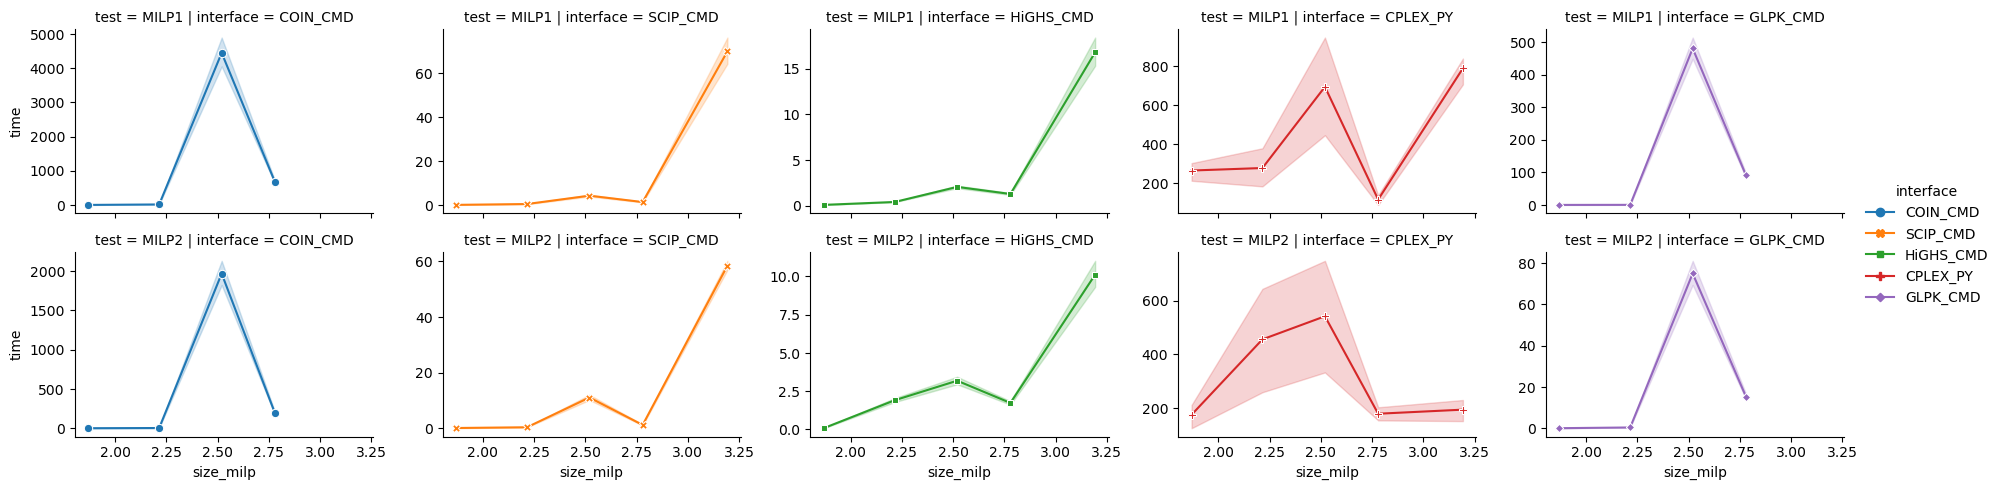

In [131]:
sns.relplot(data=df.dropna().query('model != "iLB1027"'), x="size_milp", y="time", col="interface", row="test", kind="line", height=2.5, aspect=1.5, markers=True, dashes=False, hue="interface", style="interface",
            row_order=['MILP1', 'MILP2'], facet_kws={'sharey': False} )

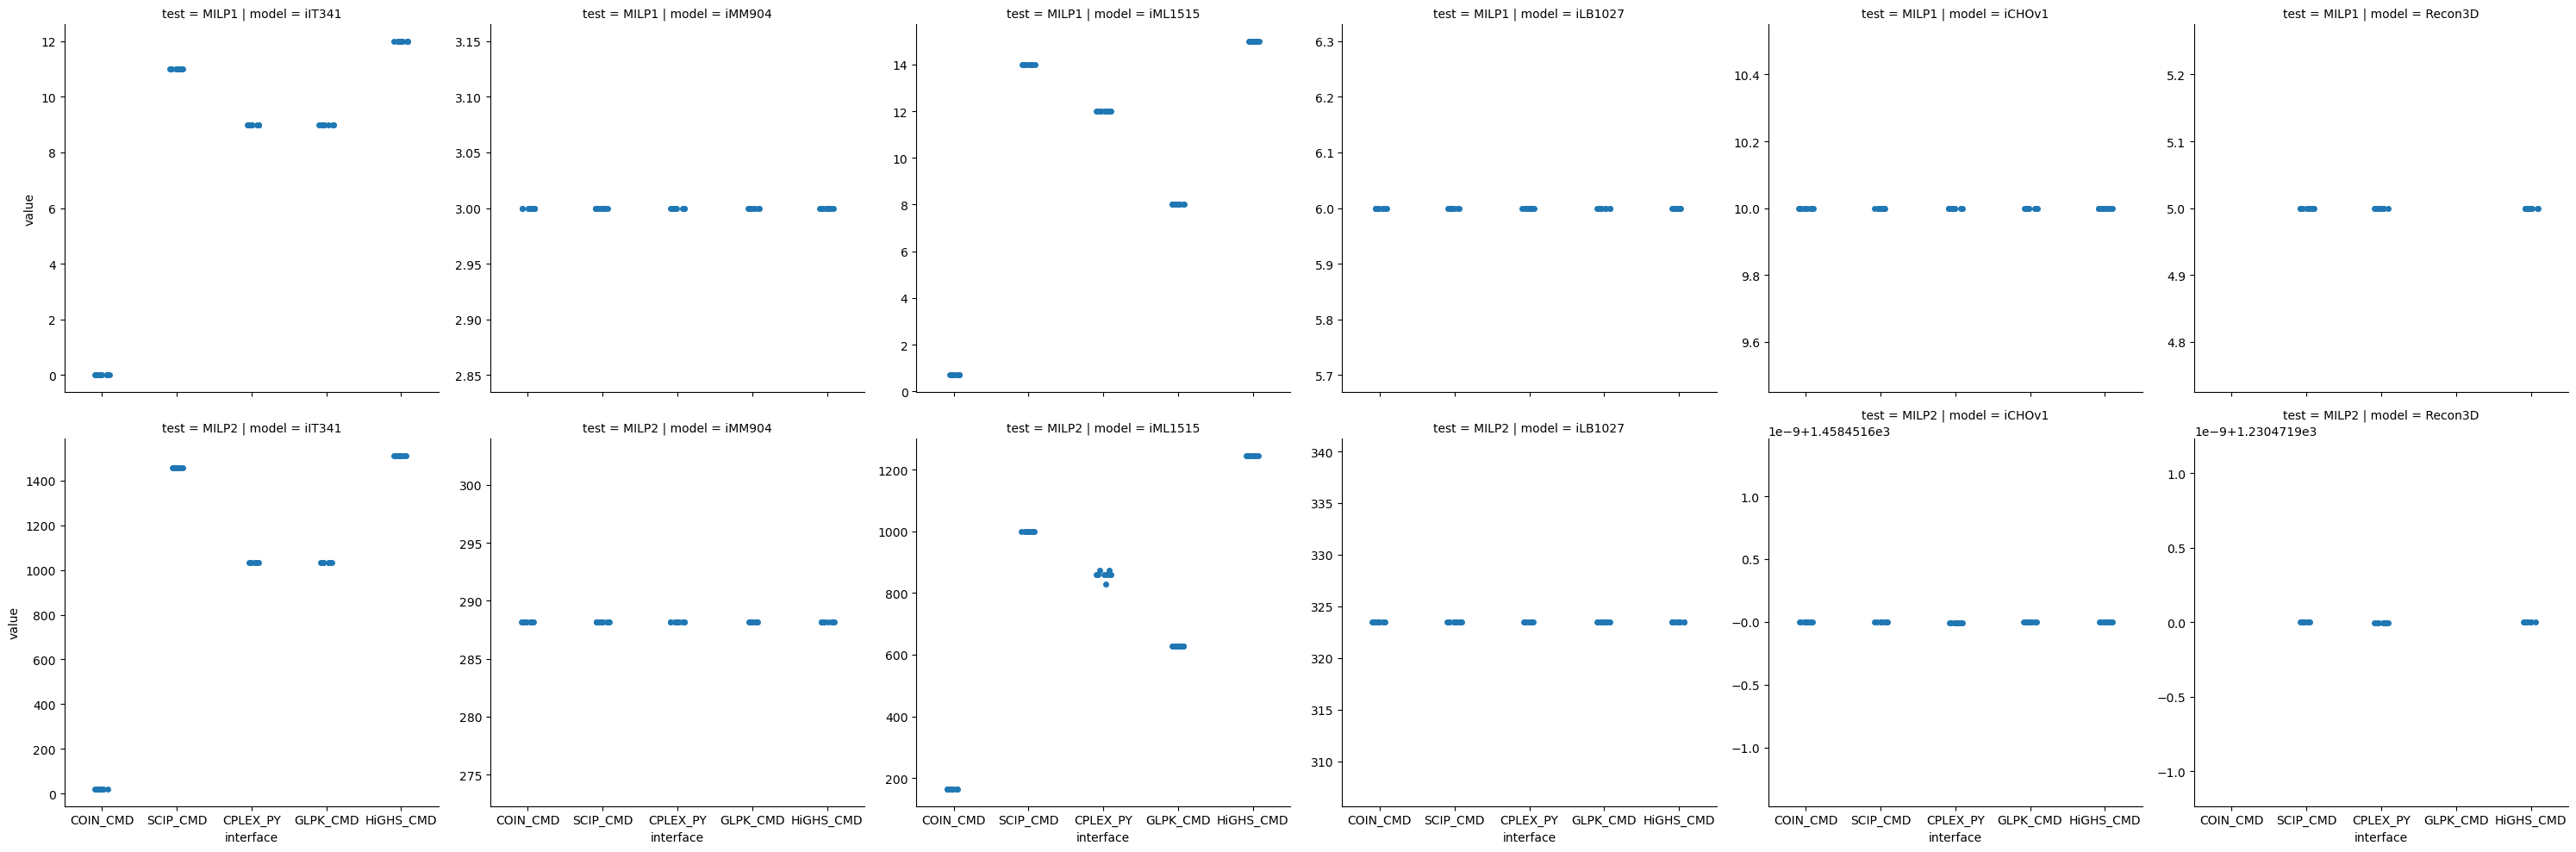

In [64]:
sns.catplot(data=df.dropna(), y="value", col="model", row="test", x="interface",
            row_order=['MILP1', 'MILP2'], col_order=model_size.keys(), sharey=False)